In [2]:
#Library used 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA



In [3]:
fn1 = "zakaria"
ln1 = "abdallah"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [4]:
#visualization of the data
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
# visualize the target
y = pd.DataFrame(california_housing.target,columns=california_housing.target_names)
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


Ex 1(a) 

In [6]:
# Load the California housing dataset
ones_column = np.ones((california_housing.data.shape[0], 1))
x = np.hstack((ones_column, california_housing.data))
y= california_housing.target
# split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.2)
# now we need to estimate the values of theta 
w = np.linalg.inv((x_train).T@x_train)@x_train.T@y_train
print(w)


[-3.62717267e+01  4.36967471e-01  9.60172865e-03 -1.10566963e-01
  6.10934039e-01 -2.41271821e-06 -3.42949468e-03 -4.14643435e-01
 -4.27253444e-01]


In [7]:
res = y_train - x_train @ w
print(res)

[-0.95007641  0.22172937 -0.65111975 ... -0.32348265 -1.22843811
  0.52458981]


In [8]:
# Custom function to compute Mean Squared Error (MSE)
def custom_mean_squared_error(true_values, predicted_values):
    return ((true_values - predicted_values) ** 2).mean()

# Custom function to compute R2 Score
def custom_r2_score(true_values, predicted_values):
    ss_res = ((true_values - predicted_values) ** 2).sum()
    ss_tot = ((true_values - true_values.mean()) ** 2).sum()
    return 1 - (ss_res / ss_tot)

In [9]:
# now let us compare the values of the test 
#predicted values

y_predicted = x_test@w

mean_square_error_custom = np.double(custom_mean_squared_error(y_test,y_predicted))
mean_squared_error_sklearn = np.double(mean_squared_error(y_test,y_predicted))

r2_score_custom= np.double(custom_r2_score(y_test,y_predicted))
r2_score_sklearn = np.double(r2_score(y_test,y_predicted))

# Displaying the differences
print("MSE (Mean Squared Error):")
print(f"  Custom Function: {mean_square_error_custom:.4f}")
print(f"  Sklearn: {mean_squared_error_sklearn:.4f}")
print(f"  Difference: {abs(mean_square_error_custom - mean_squared_error_sklearn):.4f}")

print("R2 (R2 score):")
print(f"  Custom Function: {r2_score_custom:.4f}")
print(f"  Sklearn: {r2_score_sklearn:.4f}")
print(f"  Difference: {abs(r2_score_custom - r2_score_sklearn):.4f}")

MSE (Mean Squared Error):
  Custom Function: 0.5460
  Sklearn: 0.5460
  Difference: 0.0000
R2 (R2 score):
  Custom Function: 0.6094
  Sklearn: 0.6094
  Difference: 0.0000


Ex 1(b)

Another way to compute the confidence interval 

In [10]:
n,p = x_train.shape
residual = y_train-x_train @ w
sigma_hat_square = np.sum(residual**2) / ( n - p - 1 )
alpha = 0.01  
t_critical = t.ppf(1 - alpha / 2, df=n - p - 1)
se = np.sqrt(sigma_hat_square * np.diag(np.linalg.inv(x_train.T @ x_train)))
# Calculate the confidence intervals
lower_bound = w - t_critical * se
upper_bound = w + t_critical * se
# Pair the lower and upper bounds
CI = list(zip(lower_bound, upper_bound))
CI

[(-38.1765639722229, -34.366889411843935),
 (0.4247296317278555, 0.4492053098947648),
 (0.00831978162575528, 0.010883675669852256),
 (-0.12791529731801907, -0.09321862933062511),
 (0.5311612978023432, 0.6907067810708749),
 (-1.5811028756558e-05, 1.0985592341204326e-05),
 (-0.00468202298709564, -0.0021769663644024308),
 (-0.43546355087630295, -0.3938233201141975),
 (-0.44903108065689734, -0.4054758078238003)]

Ex2

In [11]:
data = pd.read_csv("data.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [12]:
# selecting all rows as well as the columns exccept the last one which is the target
X = data.iloc[:, :-1]
# Target
y = data.iloc[:, -1]   

# Splitting the data into training and testing sets and selecting 75 percent foqr the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  
# here is the standardazing of the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)
# Fit and transform the training target data
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
# Transform the testing target data
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()
# X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)
print(reg.coef_)


[-5.28560585e+13  1.77461007e+13 -9.76511205e+12 -4.56653140e+13
 -2.51275151e+13 -4.06289215e+13 -4.08916117e+12  1.58052693e+13
  3.44343509e+13  1.07294327e+13 -4.22363019e+13  5.88689478e+13
  3.02578064e+12  5.31215346e+13 -1.71634920e+13 -1.12140826e+13
 -2.32705496e+12 -1.46847818e+13 -7.46518360e+13  1.10874717e+13
  5.15377774e+13  3.02228112e+13 -3.58360101e+12  1.75781250e-02
  1.59346435e+12  1.84760849e+13  6.57917840e+12  1.06011974e+13
  3.52249755e+13 -2.04654375e+13 -3.60168705e+13  2.43594301e+13
  3.70651544e+13 -4.97756924e+13  1.66381836e-01  6.35059674e+13
 -8.57574029e+13 -2.32711231e+13 -1.93686616e+13  1.18577727e+13
  1.70313768e+13  2.98914318e+13 -3.56098308e+13  9.83581348e+13
  7.88221727e+12  2.38840184e+13 -2.60831885e+13 -7.11019879e+12
  2.98114275e+13  2.47999633e+13  8.10215873e+13 -3.94564545e+13
  1.46228285e+13 -1.24965315e+13  4.90149007e+12  2.39451605e+13
  2.03590742e+13 -1.02358301e+13  3.67187500e-01  2.80386513e+13
  2.97649346e+13 -3.94390

We can see clearly that the coefficient carry a huge values so we need the regularization term

Ex 3-a

In [13]:

def forward_selection_single_feature(X, y):
    n = X.shape[0]
    p_values = []

    for j in range(X.shape[1]):
        # Select the j-th feature
        X_j = X[:, j].reshape(-1, 1)

        # Fit the linear regression model
        model = LinearRegression().fit(X_j, y)

        # Calculate the predictions and residuals
        predictions = model.predict(X_j)
        residuals = y - predictions
        
        # Calculate variance error
        variance_error = np.sum(residuals**2) / (n - 2)
        variance_error_Matrix = variance_error*np.linalg.inv(X_j.T.dot(X_j))
        se = np.sqrt(np.diag(variance_error_Matrix))
        
        # Calculate t-statistic
        t_stat = model.coef_ / se

        # Calculate p-value
        p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-2))
        p_values.append(p_value) 
    # Find the feature with the smallest p-value
    min_p_value = np.min(p_values)
    best_feature = np.argmin(p_values)
    
    return best_feature, min_p_value




In [14]:
best_feature, min_p_value = forward_selection_single_feature(X_train_scaled, y_train)
print(f"The best feature is at index {best_feature} with a p-value of {min_p_value}")



The best feature is at index 34 with a p-value of 0.0


Intrepretation :

### Understanding the P-value's Role:
- The p-value evaluates the predictive significance of each feature in relation to the target variable `y`.
- A feature with a p-value lower than 0.05 is considered to have a statistically significant predictive power for `y`.
- The selection of features is driven by identifying those with the lowest p-values, signifying the most substantial evidence against the null hypothesis (which states that the feature is not influential).

so p-value plays a crucial role in determing which feature has more prior on the other then based on this value we can deduce which feature we can keep and which one we can eliminate 

Ex 3-b

In [15]:
def forward_selection_iterative(X, y, max_features=None):
    selected_features = []
    current_residuals = y.copy()
    n = X.shape[0]
    remaining_features = list(range(X.shape[1]))
    iterations = min(len(remaining_features), max_features) if max_features else len(remaining_features)

    for l in range(iterations):
        min_p_value = np.inf
        best_feature_index = None
        best_residuals = None

        for j in remaining_features:
            X_j = X[:, j].reshape(-1, 1)
            model = LinearRegression().fit(X_j, current_residuals)
            predictions = model.predict(X_j)
            residuals = current_residuals - predictions
            variance_error = np.sum(residuals**2) / (n - 2)
            variance_error_Matrix = variance_error*np.linalg.inv(X_j.T.dot(X_j))
            se = np.sqrt(np.diag(variance_error_Matrix))
            t_stat = model.coef_ / se
            p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-2))

            if p_value < min_p_value:
                min_p_value = p_value
                best_feature_index = j
                best_residuals = residuals

        if best_feature_index is not None:
            selected_features.append(best_feature_index)
            remaining_features.remove(best_feature_index)
            current_residuals = best_residuals

    return selected_features




In [16]:
selected_features = forward_selection_iterative(X_train_scaled, y_train, max_features=None)
print("Selected features:", selected_features)

Selected features: [34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13, 208, 74, 172, 190, 194, 38, 198, 133, 191, 75, 165, 7, 59, 81, 17, 131, 18, 118, 99, 68, 57, 203, 113, 54, 170, 29, 71, 66, 15, 2, 112, 98, 43, 88, 50, 121, 94, 28, 193, 14, 70, 48, 175, 199, 179, 100, 184, 182, 117, 101, 52, 32, 61, 33, 6, 96, 4, 21, 130, 83, 41, 134, 120, 23, 73, 162, 128, 80, 26, 176, 95, 206, 192, 47, 147, 44, 89, 186, 69, 140, 132, 90, 187, 86, 109, 42, 37, 156, 180, 40, 195, 119, 157, 205, 137, 152, 144, 116, 111, 11, 92, 49, 62, 161, 103, 171, 35, 91, 106, 166, 169, 143, 164, 84, 24, 60, 76, 163, 51, 124, 181, 16, 150, 110, 87, 36, 65, 64, 173, 55, 107, 19, 146, 114, 56, 126, 20, 196, 105, 188, 1, 27, 0, 160, 45, 204, 122, 78, 153, 148, 149, 142, 97, 136, 197, 108, 177, 145, 25, 46, 53, 154, 151, 72, 12, 63, 185, 104, 22, 102, 8, 9, 200, 127, 82, 125, 67, 85, 201, 178, 10, 5, 207, 159, 209, 139, 141, 39, 93, 155, 202, 189, 115, 138, 31, 158, 3]


# 3b-c:
substructing the prediction has a lot of reason which are the following :

Unexplained Variance: This approach ensures the next feature selected targets the unexplained variance in y. It helps in identifying what additional information other features can provide.

Avoiding Redundancy: By continually updating y to focus on unexplained variance, we prevent the model from selecting features that explain variance already accounted for. This avoids redundancy in the model.

Enhancing Predictive Power: Each new feature is chosen based on its ability to explain this residual variance, thus iteratively enhancing the model's explanatory and predictive power.

Comprehensive Model: This iterative process of refining residuals and selecting new features leads to a model that encompasses multiple facets of the target variable, creating a more nuanced and effective predictive tool.

Ex 3c: 

In [17]:
def forward_selection_iterative_with_halt(X, y, max_features=None, p_value_threshold=0.05):
    selected_features = []
    current_residuals = y.copy()
    n = X.shape[0]
    remaining_features = list(range(X.shape[1]))
    p_values_per_iteration = []

    while X.shape[1] > 0 and (max_features is None or len(selected_features) < max_features):
        min_p_value = np.inf
        best_feature_index = None
        best_residuals = None

        for j in remaining_features:
            X_j = X[:, j].reshape(-1, 1)
            model = LinearRegression().fit(X_j, current_residuals)
            predictions = model.predict(X_j)
            residuals = current_residuals - predictions
            variance_error = np.sum(residuals**2) / (n - 2)
            variance_error_Matrix = variance_error*np.linalg.inv(X_j.T.dot(X_j))
            se = np.sqrt(np.diag(variance_error_Matrix))
            t_stat = model.coef_ / se
            p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=n-2))

            if p_value < min_p_value:
                min_p_value = p_value
                best_feature_index = j
                best_residuals = residuals

        if min_p_value > p_value_threshold:
            break

        if best_feature_index is not None:
            selected_features.append(best_feature_index)
            remaining_features.remove(best_feature_index)
            current_residuals = best_residuals
            p_values_per_iteration.append(min_p_value)

    return selected_features, p_values_per_iteration


Selected features: [34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13]


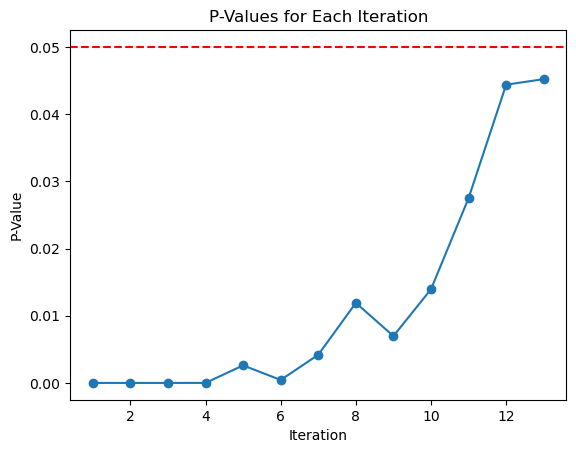

In [18]:

selected_features, p_values_per_iteration = forward_selection_iterative_with_halt(X_train_scaled, y_train_scaled, max_features=None)
print("Selected features:", selected_features)

plt.plot(range(1, len(p_values_per_iteration) + 1), p_values_per_iteration, marker='o')
plt.xlabel('Iteration')
plt.ylabel('P-Value')
plt.title('P-Values for Each Iteration')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()


So they are only 13 features that have a significant impact on the data so we can reduce the dat

In [19]:
def run_regression_and_plot(X_train, y_train, X_test, y_test, model, alphas, plot=True):
    # Initialize storage for coefficients and scores
    coefficients = []
    train_scores = []
    test_scores = []
    print(model)
    # Loop through the alphas, run the model, and store the results
    for alpha in alphas:
        
        # Set the model's alpha value
        if isinstance(model, ElasticNet or Lasso):
            model.set_params(alpha=alpha, max_iter=10000, tol=0.009)
        model.set_params(alpha=alpha)
        
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Store coefficients
        coefficients.append(model.coef_)
        
        # Calculate and store R-squared scores
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
    
    # Plotting if enabled
    if plot:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Coefficients
        ax1.plot(alphas, coefficients)
        ax1.set_xscale('log')
        ax1.set_xlabel('Alpha')
        ax1.set_ylabel('Coefficients')
        ax1.set_title('Coefficients Evolution')

        # R-squared scores
        ax2.plot(alphas, train_scores, label='Train Score')
        ax2.plot(alphas, test_scores, label='Test Score')
        ax2.set_xscale('log')
        ax2.set_xlabel('Alpha')
        ax2.set_ylabel('R-squared')
        ax2.set_title('R-squared Evolution')
        ax2.legend()

        plt.show()
        
    return alphas, coefficients, train_scores, test_scores



Ridge()


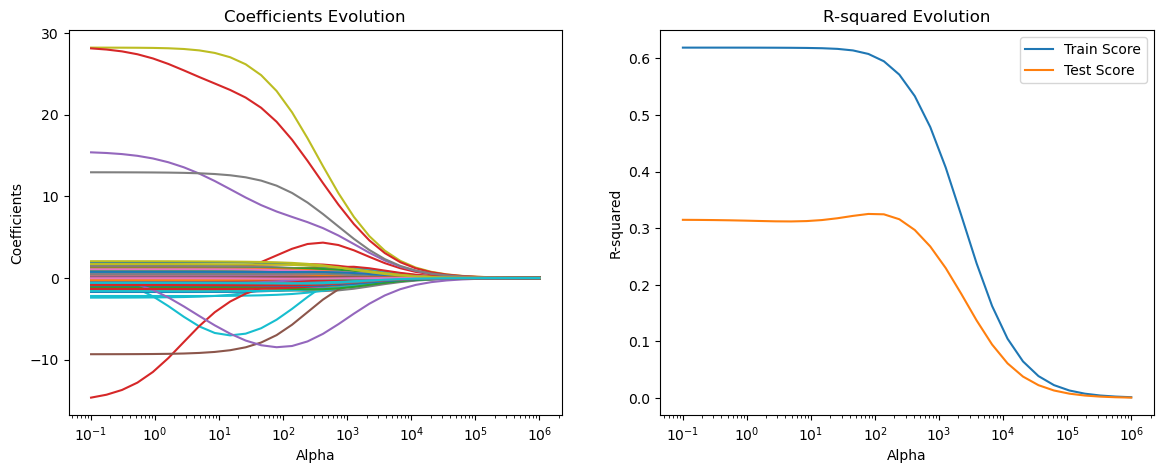

In [20]:
alphas = np.logspace(-1, 6, 30)
ridge_model = Ridge()
run_regression_and_plot(X_train_scaled, y_train, X_test_scaled, y_test,ridge_model, alphas);

Lasso()


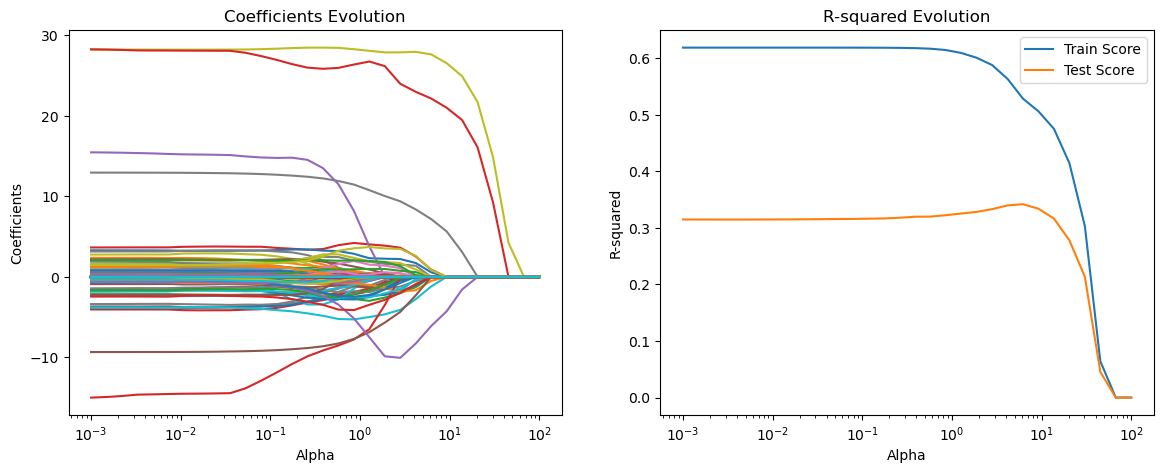

In [21]:
alphas_lasso = np.logspace(-3, 2, 30)
lasso_model = Lasso()
run_regression_and_plot(X_train_scaled, y_train, X_test_scaled, y_test, lasso_model, alphas_lasso);

ElasticNet()


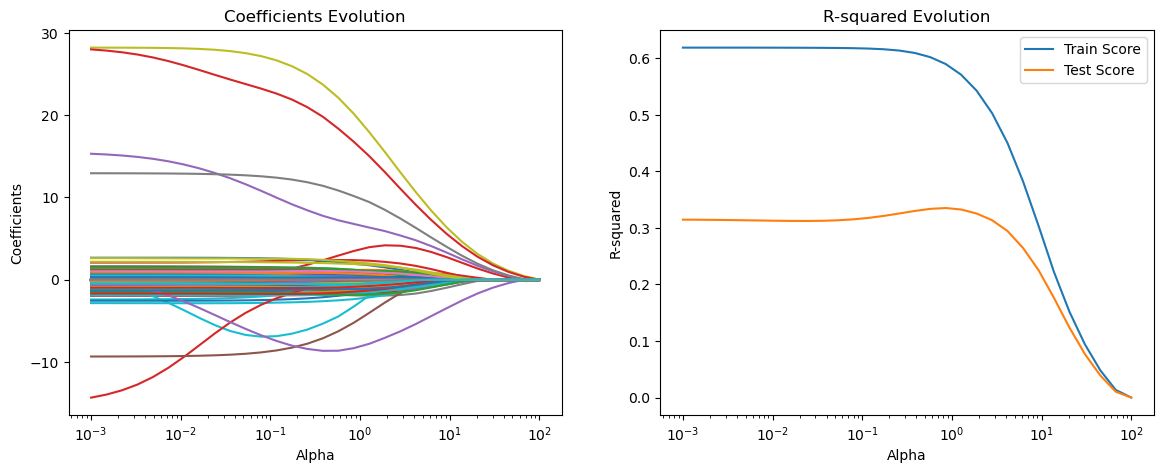

In [22]:
alphas_elasticnet = np.logspace(-3, 2, 30)

# Initialize the ElasticNet model
elasticnet_model = ElasticNet()

run_regression_and_plot(X_train_scaled, y_train, X_test_scaled, y_test, elasticnet_model, alphas_elasticnet);


In [23]:
def perform_pca_using_svd(X):
    # Perform SVD
    U, s, V = np.linalg.svd(X)

    return U, s, V



In [24]:
U, s, V = perform_pca_using_svd(X_train_scaled)


In [25]:
def plot_covariance_matrix(X):
    covariance_matrix = np.cov(X.T@X)
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(covariance_matrix, annot=False, fmt=".2f", cmap='viridis')
    plt.title("Covariance Matrix Heatmap")
    plt.show()

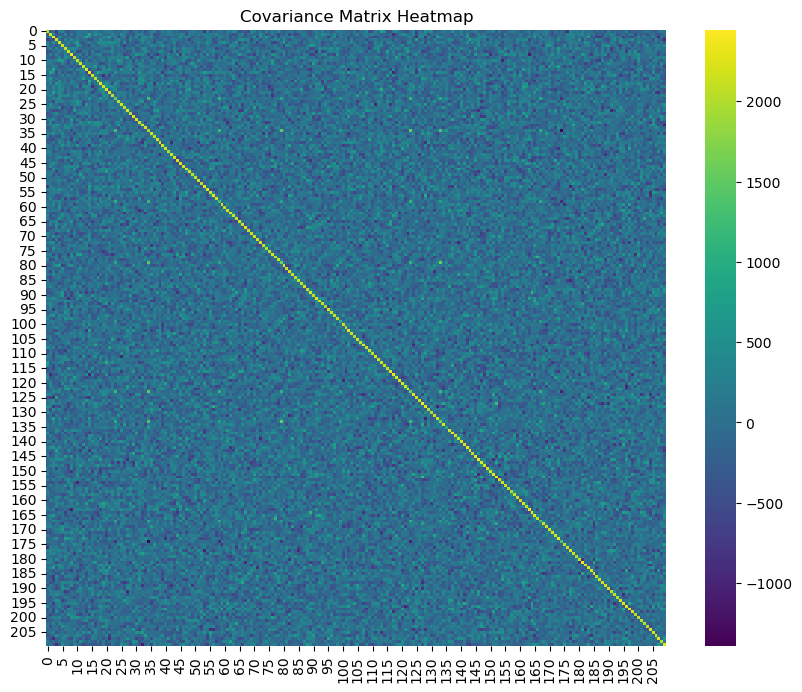

In [26]:
plot_covariance_matrix(X_train_scaled)

In [27]:
data_matrix = X_train_scaled
U, s, V = perform_pca_using_svd(data_matrix)


In [28]:
def plot_explained_variance_(X, threshold=0.90):
    
    _, s, _ = perform_pca_using_svd(X)

    # Calculate the variance explained by each singular value
    total_variance = np.sum(s**2) / (len(X) - 1)
    explained_variance = s**2 / (len(X) - 1)
    explained_variance_ratio = explained_variance / total_variance

    # Calculate the cumulative variance
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # Determine the number of components for the given threshold
    num_components_for_threshold = np.where(cumulative_variance >= threshold)[0][0] + 1

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(s) + 1), cumulative_variance, marker='*', color='b')
    plt.axhline(y=threshold, color='brown', linestyle='--')
    plt.axvline(x=num_components_for_threshold, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Explained Variance by PCA Components')
    plt.show()

    return num_components_for_threshold



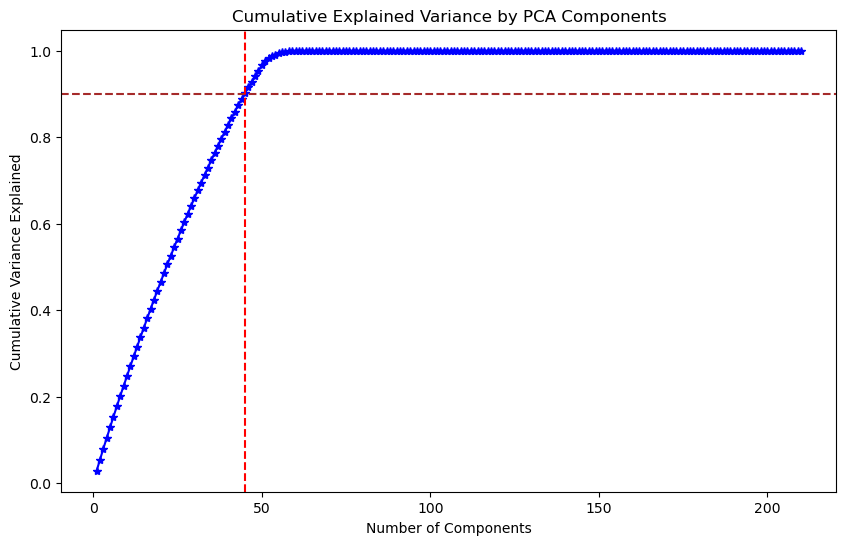

Number of components needed to explain more than 90% of the variance: 45


In [29]:
num_components = plot_explained_variance_(data_matrix)
print(f"Number of components needed to explain more than 90% of the variance: {num_components}")


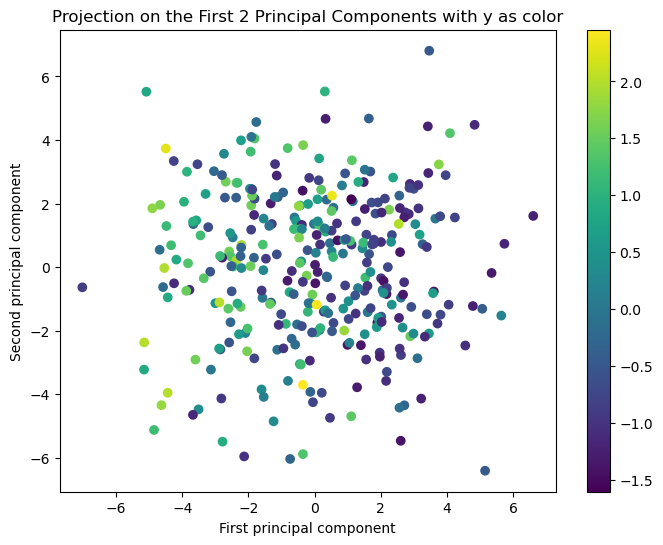

In [30]:
def plot_projected_data_interpretation(X, y, k=2):
    # Compute PCA using SVD
    _, _, V = perform_pca_using_svd(X)

    # Project data onto the first k components
    X_projected = np.dot(X, V.T[:, :k])
    # Plot
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='viridis')
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.colorbar(scatter)
    plt.title(f'Projection on the First {k} Principal Components with y as color')
    plt.show()
    return _

interpretation = plot_projected_data_interpretation(data_matrix, y_train_scaled)


it is clear that the first two principal components do not distinctly separate the data, meaning that they don't capture the variance in the target variable `y` effectively. This implies a more complex relationship between the features and `y`, possibly requiring analysis beyond two dimensions. It may be necessary to explore additional principal components or alternative methods, particularly if the relationships are non-linear. In essence, understanding `y` in relation to the features might need a more nuanced approach than what's provided by the first two principal components.

In [31]:
def plot_first_two_principal_directions(X, k=2):
    # Compute SVD
    _, _, V = perform_pca_using_svd(X)
    # Plotting the data
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    # Plot the first k principal directions
    for i in range(k):
        # Scaling the direction vectors for better visualization
        vector = V[i, :2] * max(X.max(axis=0)) * 2
        plt.arrow(0, 0, vector[0], vector[1], head_width=0.1, head_length=0.1, fc='red', ec='red')
    plt.xlabel('First Feature')
    plt.ylabel('Second Feature')
    plt.title('First Two Principal Directions Over the Data')
    plt.grid(True)
    plt.axis('equal')
    plt.show()





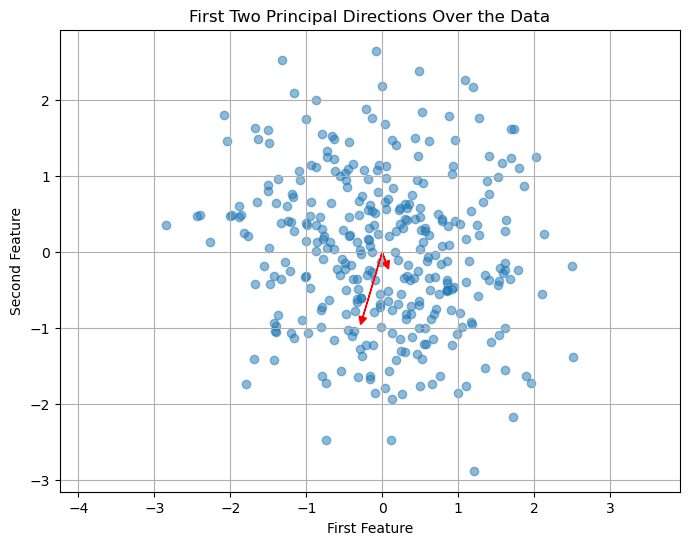

In [32]:
plot_first_two_principal_directions(data_matrix)

In [33]:
def perform_pcr_ols_and_plot_scores(X_train, X_test, y_train, y_test, V_matrix, max_components=50):
    
    optimal_k = None
    highest_score = -np.inf
    r2_scores = []

    # Iterating over the range of components
    for k in range(1, max_components + 1):
        # Projection onto the first k components
        train_projected = X_train.dot(V_matrix.T[:, :k])
        test_projected = X_test.dot(V_matrix.T[:, :k])

        # Fitting the linear regression model
        model = LinearRegression()
        model.fit(train_projected, y_train)

        # Making predictions and evaluating
        predictions = model.predict(test_projected)
        score = r2_score(y_test, predictions)
        r2_scores.append(score)

        # Update the best score and corresponding k
        if score > highest_score:
            highest_score = score
            optimal_k = k

    # Visualizing the score evolution
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_components + 1), r2_scores, marker='o', color='blue', linestyle='--', label='R-squared Score')
    plt.axvline(x=optimal_k, color='brown', linestyle='-', label=f'Optimal k: {optimal_k}')
    plt.xlabel('Number of Components')
    plt.ylabel('R-squared Score')
    plt.title('R-squared Score Evolution with PCA Components')
    plt.legend()
    plt.show()

    return optimal_k, highest_score



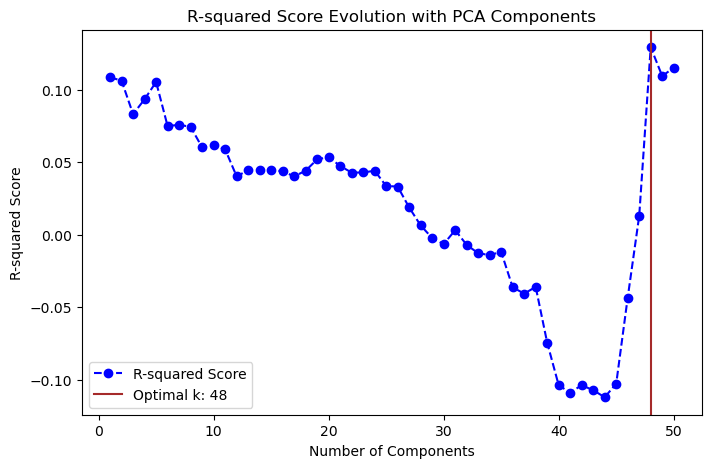

The best number of components is 48 with an R-squared score of 0.1292.


In [34]:
best_k, best_score = perform_pcr_ols_and_plot_scores(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, V)
print(f"The best number of components is {best_k} with an R-squared score of {best_score:.4f}.")



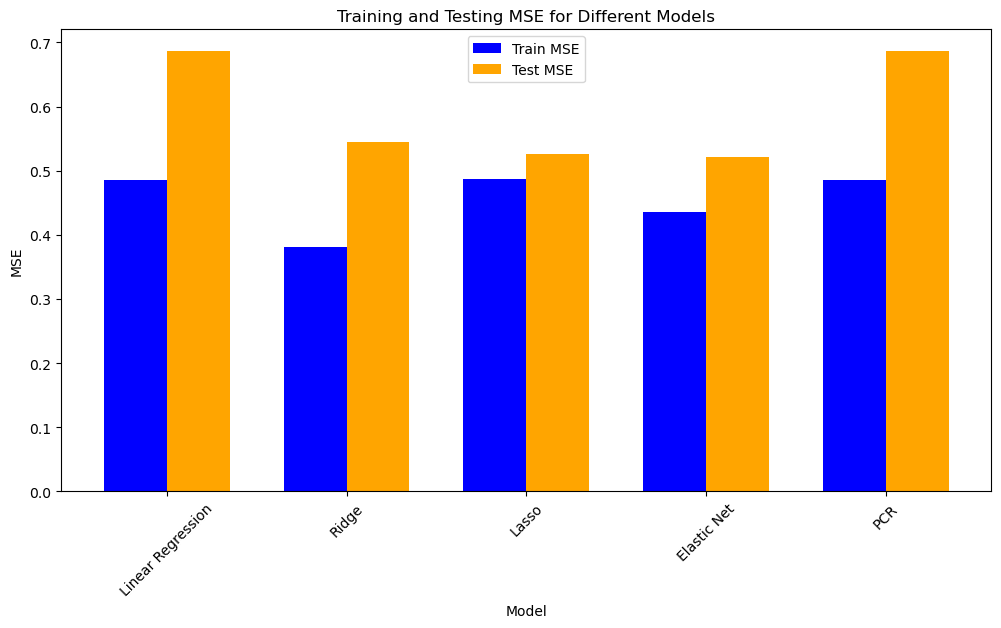

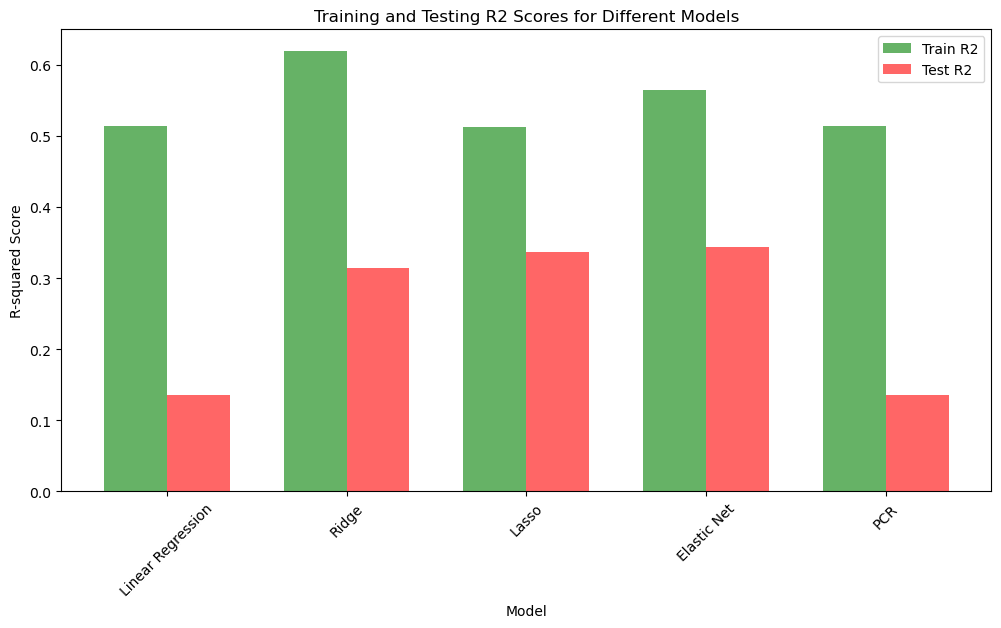

In [35]:
k = 48  # This is the number of PCA components i choose

# Performing PCA on the scaled data
pca = PCA(n_components=k)
X_pca_k_train = pca.fit_transform(X_train_scaled)
X_pca_k_test = pca.transform(X_test_scaled)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1,max_iter=10000, tol=0.01),
    "Lasso": Lasso(alpha=0.1,max_iter=10000, tol=0.01),
    "Elastic Net": ElasticNet(alpha=0.1, max_iter=10000, tol=0.01),
    "PCR": LinearRegression()
    
}

# Initialize storage for MSE and R-squared scores
metrics = {model_name: {"mse_train": None, "mse_test": None, "r2_train": None, "r2_test": None} for model_name in models}

# Fit the models and calculate errors and R-squared scores
for name, model in models.items():
    if name == "PCR":
        model.fit(X_pca_k_train, y_train_scaled)
    else:
        model.fit(X_train_scaled, y_train_scaled)

    # Predict on train and test sets
    if name == "PCR":
        y_train_pred = model.predict(X_pca_k_train)
        y_test_pred = model.predict(X_pca_k_test)
    else:
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    # Fit the model
    model.fit(X_train_scaled, y_train_scaled)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate MSE and R-squared
    metrics[name]["mse_train"] = mean_squared_error(y_train_scaled, y_train_pred)
    metrics[name]["mse_test"] = mean_squared_error(y_test_scaled, y_test_pred)
    metrics[name]["r2_train"] = r2_score(y_train_scaled, y_train_pred)
    metrics[name]["r2_test"] = r2_score(y_test_scaled, y_test_pred)

# Plotting the MSE and R-squared scores in separate figures
# Plot MSE
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(models))

for i, (name, metric) in enumerate(metrics.items()):
    ax.bar(index[i] - bar_width/2, metric['mse_train'], bar_width, color='blue', label='Train MSE' if i == 0 else "")
    ax.bar(index[i] + bar_width/2, metric['mse_test'], bar_width, color='orange', label='Test MSE' if i == 0 else "")

ax.set_xlabel('Model')
ax.set_ylabel('MSE')
ax.set_title('Training and Testing MSE for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(metrics.keys(), rotation=45)
ax.legend()

plt.show()

# Plot R-squared
fig, ax = plt.subplots(figsize=(12, 6))

for i, (name, metric) in enumerate(metrics.items()):
    ax.bar(index[i] - bar_width/2, metric['r2_train'], bar_width, color='green', alpha=0.6, label='Train R2' if i == 0 else "")
    ax.bar(index[i] + bar_width/2, metric['r2_test'], bar_width, color='red', alpha=0.6, label='Test R2' if i == 0 else "")

ax.set_xlabel('Model')
ax.set_ylabel('R-squared Score')
ax.set_title('Training and Testing R2 Scores for Different Models')
ax.set_xticks(index)
ax.set_xticklabels(metrics.keys(), rotation=45)
ax.legend()

plt.show()


***Model Summaries and Characteristics***:

**Linear Regression:**

Characteristic: This is the baseline model which assumes a linear relationship between the independent variables and the dependent variable

Performance: It has high (almost the one whose error is the highest in training and test)training and testing errors, This suggests that the model may not be capturing the complexity of the dataset well, which could be a sign of underfitting.

**Ridge Regression (L2 Regularization):**

Characteristic: It penalizes the sum of squares of the model coefficients. This reduces model complexity and prevents overfitting, which is particularly useful when dealing with multicollinear data or when the number of features is greater than the number of observations.

Performance: Shows slightly lower errors than Linear Regression, indicating that the addition of L2 regularization has helped improve the model by penalizing large coefficients and thus reducing overfitting.

**Lasso Regression (L1 Regularization):**

Characteristic: Lasso performs both variable selection and regularization, which helps to increase the model's interpretability by reducing the number of variables to those that are only most important.

Performance: The errors for Lasso are lower than Linear Regression but slightly higher than Ridge, suggesting that while the L1 regularization helps in feature selection, it might not be the best at capturing the relationships in the data for this particular case.

**Elastic Net:**

Characteristic: Combines L1 and L2 regularization to balance between Ridge and Lasso's characteristics. It's good when there are correlations between parameters or when you want to include model interpretability and complexity reduction.

Performance: The error rates are closer to those of Lasso, which could mean that the combination of L1 and L2 regularization is not significantly more beneficial than L1 alone for this data.

**PCR (Principal Component Regression):**

Characteristic: PCR uses PCA for dimensionality reduction before applying Linear Regression. It's useful when features are correlated or when you want to reduce the complexity of the model.

Performance: apparently has higher MSE values, which means that while it reduces dimensionality, it may also be discarding useful information, leading to a less accurate model.

**Linear Regression:**

Training R²: This model has a moderate R² score for the training data, which means it has a moderate level of explanation for the variance in the training dataset.which is about 0.52, which suggests the model explains about 50% of the variance in the training data.

Testing R²: The testing R² is significantly lower (0.12) than the training R², which indicates that the model doesn't generalize as well to the testing data. This could be a sign of overfitting to the training data or that the model is too simplistic to capture the underlying patterns in the data.

**Ridge:**

Training R²: This model has the highest R² score on the training data (0.62), even higher than PCR, which suggests that it is the best at explaining the variance in the training dataset among all models.

Testing R²: The testing R² is also slightly high(0.31), though not the highest, which means it generalizes well but there might be another model that generalizes slightly better.

**Lasso:**

Training R²: Lasso has a training R² score that is less than Ridge's (0.5), indicating that the model explains less variance in the training data. This is likely due to the L1 regularization that can shrink some coefficients to zero, thus possibly omitting some variables that might have some predictive power.

Testing R²: The testing R² is higher than Ridge's score (0.35), but it's clearly higher than the Linear Regression's testing R²,it has the highest score on the testing data, indicating it generalizes the best among all models considered.

**Elastic Net:**

Training R²: A bit higher than Lasso at 0.57, suggesting a better fit to the training data, as it is a combination of both L1 and L2 regularization.

Testing R²: Equally the highest along with Lasso at 0.35, which shows it generalizes as well as the Lasso model to new data.

**PCR (Principal Component Regression):**

Training R²: Similar to Lasso at 0.5, explaining half of the variance in the training data.This could be explained due to the dimensionality reduction aspect of PCR, which may capture the most important variance in the data.

Testing R²: Quite low at 0.13, which is only slightly better than Linear Regression and indicates poor generalization to testing data.